### Feature Correlation Matrix

A correlation matrix is used in Machine Learning to identify redundant features that are correlated. We will take a table of feature samples generated from a multiband image and create a correlation matrix. This matrix is used to identify and visualize patterns in the given data and select features for a machine learning model.

#### Setup and Data Download

The following blocks of code will install the required packages and download the datasets to your environment.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/misc/'
csv_name = 'feature_sample_data.csv'

download(data_url + csv_name)

Downloaded data/feature_sample_data.csv


#### Data Pre-Processing

In [4]:
csv_path = os.path.join(data_folder, csv_name)
table = pd.read_csv(csv_path)

We use Pandas' [`pd.DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method to calculate pairwise [Pearson's Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) for each variable.



In [6]:
# Calculate pairwise Pearson's Correlation Coefficient
correlations = table.corr()

#### Plotting using Matplotlib

We can use Matplotlib's [`matplotlib.pyplot.matshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html) to display any array as a matrix.


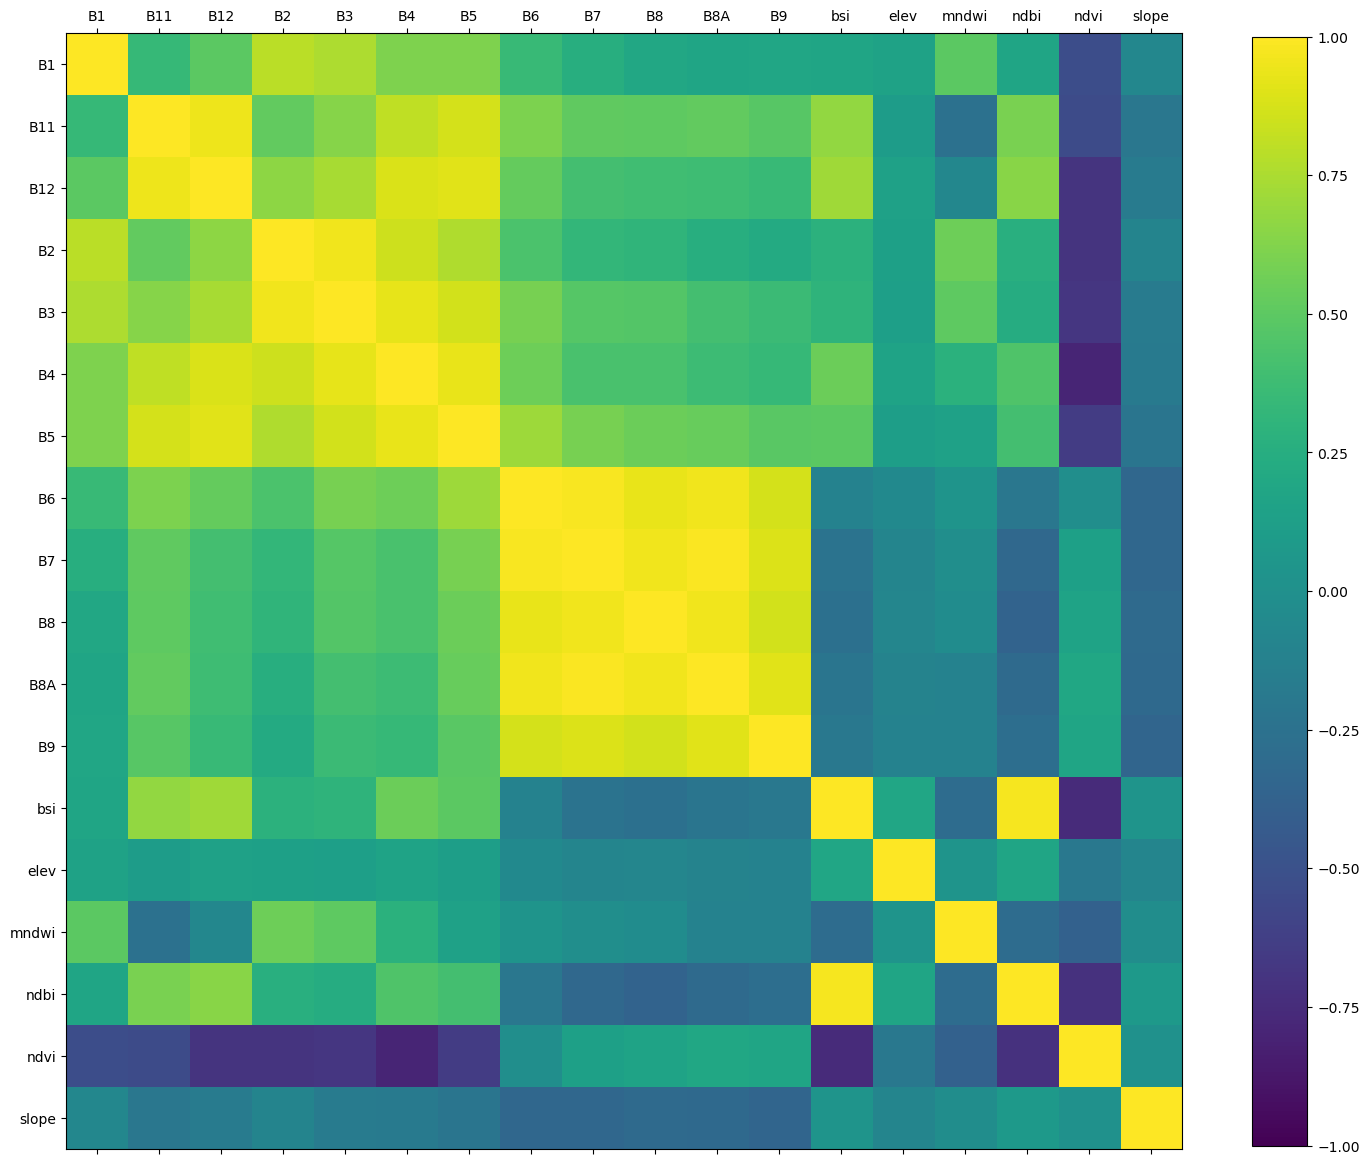

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18,18)
im = ax.matshow(correlations, vmin=-1, vmax=1) # use .matshow to display 
fig.colorbar(im, shrink=0.8)

ticks = np.arange(0,len(table.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(table.columns)
ax.set_yticklabels(table.columns)


output_folder = 'output'
output_path = os.path.join(output_folder, 'correlation_matrix.png')

plt.savefig(output_path, dpi=300)
plt.show()